In [3]:
import numpy as np
import cv2
from keras.preprocessing import image
import dlib
from imutils import face_utils
import imutils
from sklearn import preprocessing
import math
from keras.models import model_from_json

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml')

model = model_from_json(open("/content/drive/My Drive/fer_model.json", "r").read())
model.load_weights('/content/drive/My Drive/model_wts.h5') 



emotions = ( 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise')
# initialize dlib's face detector and create a predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")


def detect_parts(image):
	distances = []
	
	image = imutils.resize(image, width=200, height=200)
	
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	
	rects = detector(gray, 1)
	

	for (i, rect) in enumerate(rects):
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)
		distances = euclidean_all(shape)
	
	return distances

def euclidean(a, b):
    dist = math.sqrt(math.pow((b[0] - a[0]), 2) + math.pow((b[1] - a[1]), 2))
    return dist 

# calculates distances between all 68 elements
def euclidean_all(a):  
	distances = ""
	for i in range(0, len(a)):
		for j in range(0, len(a)):
			dist = euclidean(a[i], a[j])
			dist = "%.2f" % dist;
			distances = distances + " " + str(dist)
	return distances



In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
try:
  
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  

<IPython.core.display.Javascript object>

Saved to photo.jpg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


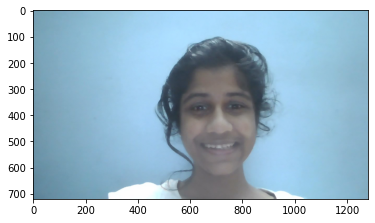

In [16]:

import matplotlib.image as image
img = image.imread("/content/drive/MyDrive/WIN_20220123_04_37_16_Pro.jpg")
from matplotlib import pyplot as plt
    #Show the image with matplotlib
plt.imshow(img)
plt.show()

 


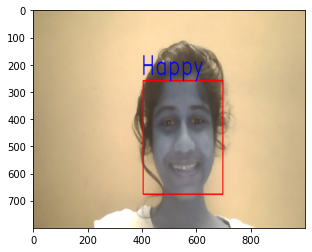

In [9]:


 
img = cv2.imread("/content/drive/MyDrive/WIN_20220123_04_37_16_Pro.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 7)

for (x,y,w,h) in faces:
 cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4) #draw rectangle to main image
 detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
 distances = detect_parts(detected_face)

if(len(distances)!=0):
 val = distances.split(" ")[1:]
 val = np.array(val)
 val = val.astype(np.float)
 val = np.expand_dims(val, axis = 1)			
 minmax = preprocessing.MinMaxScaler()
 val = minmax.fit_transform(val)
 val = val.reshape(1,4624)

 predictions = model.predict(val) #store probabilities of 7 expressions
 #find max indexed array ( 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise')
  #print ("Angry: %", predictions[0][0]/1.0 * 100)
   # print ("Disgust: %", predictions[0][1]/1.0 * 100)
    #print ("Fear: %", predictions[0][2]/1.0 * 100)
  #  print ("Happy: %", predictions[0][3]/1.0 * 100)
   # print ("Neutral: %", predictions[0][4]/1.0 * 100)
   # print ("Sad: %", predictions[0][5]/1.0 * 100)	
  #  print ("Surprised: %", predictions[0][6]/1.0 * 100)		
   # print ("----------------------"	)	
 max_index = np.argmax(predictions[0])
 emotion = emotions[max_index]
		

 cv2.putText(img, emotion, (int(x-10), int(y-20)), cv2.FONT_HERSHEY_DUPLEX, 3, (0,0,255), 2)
		

 resized_img = cv2.resize(img, (1000, 800))
   

    
 from matplotlib import pyplot as plt
    #Show the image with matplotlib
 plt.imshow(resized_img)
 plt.show()


In [18]:
cv2.imwrite('emo.jpg', resized_img)


True

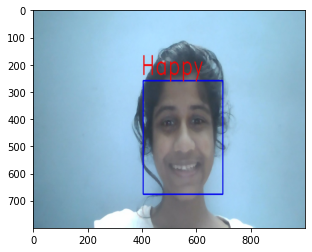

In [19]:

import matplotlib.image as image
img = image.imread("/content/emo.jpg")
from matplotlib import pyplot as plt
    #Show the image with matplotlib
plt.imshow(img)
plt.show()
